### Baseline model for batch monitoring example

In [1]:
import requests
import datetime
import pandas as pd

from joblib import load, dump
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
files = [('green_tripdata_2024-03.parquet', './data')]

print("Download files:")
for file, path in files:
    url=f"https://d37ci6vzurychx.cloudfront.net/trip-data/{file}"
    resp=requests.get(url, stream=True)
    save_path=f"{path}/{file}"
    with open(save_path, "wb") as handle:
        for data in tqdm(resp.iter_content(),
                        desc=f"{file}",
                        postfix=f"save to {save_path}",
                        total=int(resp.headers["Content-Length"])):
            handle.write(data)

Download files:


green_tripdata_2024-03.parquet: 100%|██████████| 1372372/1372372 [00:22<00:00, 62069.32it/s, save to ./data/green_tripdata_2024-03.parquet]


**Data Exploration**

In [26]:
march_data = pd.read_parquet('data/green_tripdata_2024-03.parquet')
march_data.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-03-01 00:10:52,2024-03-01 00:26:12,N,1.0,129,226,1.0,1.72,12.8,1.0,0.5,3.06,0.0,NaN,1.0,18.36,1.0,1.0,0.00
1,2,2024-03-01 00:22:21,2024-03-01 00:35:15,N,1.0,130,218,1.0,3.25,17.7,1.0,0.5,0.00,0.0,NaN,1.0,20.20,2.0,1.0,0.00
2,2,2024-03-01 00:45:27,2024-03-01 01:04:32,N,1.0,255,107,2.0,4.58,23.3,1.0,0.5,3.50,0.0,NaN,1.0,32.05,1.0,1.0,2.75
3,1,2024-03-01 00:02:00,2024-03-01 00:23:45,N,1.0,181,71,1.0,0.00,22.5,0.0,1.5,0.00,0.0,NaN,1.0,24.00,1.0,1.0,0.00
4,2,2024-03-01 00:16:45,2024-03-01 00:23:25,N,1.0,95,135,1.0,1.15,8.6,1.0,0.5,1.00,0.0,NaN,1.0,12.10,1.0,1.0,0.00


In [27]:
march_data.tail(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
57452,2,2024-03-31 21:19:00,2024-03-31 21:30:00,None,NaN,25,61,NaN,1.45,12.08,0.0,0.0,2.52,0.00,NaN,1.0,15.60,NaN,NaN,NaN
57453,2,2024-03-31 22:30:00,2024-03-31 22:35:00,None,NaN,41,42,NaN,1.13,12.24,0.0,0.0,0.00,0.00,NaN,1.0,13.24,NaN,NaN,NaN
57454,2,2024-03-31 22:43:00,2024-03-31 22:48:00,None,NaN,223,7,NaN,13062.08,12.08,0.0,0.0,3.77,0.00,NaN,1.0,16.85,NaN,NaN,NaN
57455,2,2024-03-31 22:48:00,2024-03-31 23:12:00,None,NaN,42,249,NaN,7.96,40.52,0.0,0.0,8.75,0.00,NaN,1.0,53.02,NaN,NaN,NaN
57456,2,2024-03-31 22:08:00,2024-03-31 22:47:00,None,NaN,7,211,NaN,10.70,39.35,0.0,0.0,9.91,6.94,NaN,1.0,59.95,NaN,NaN,NaN


In [3]:
march_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,57457.000000,57457,57457,55360.000000,57457.000000,57457.000000,55360.000000,57457.000000,57457.000000,57457.000000,57457.000000,57457.000000,57457.000000,0.0,57457.000000,57457.000000,55360.000000,55353.000000,55360.000000
mean,1.877334,2024-03-16 04:02:52.405399,2024-03-16 04:21:00.076039,1.179986,95.524688,138.629149,1.309538,13.522828,17.313474,0.904472,0.577410,2.386255,0.192537,NaN,0.979378,22.904832,1.321062,1.038047,0.737730
min,1.000000,2008-12-31 23:02:24,2008-12-31 23:02:30,1.000000,1.000000,1.000000,0.000000,0.000000,-295.080000,-2.500000,-0.500000,-1.560000,0.000000,NaN,-1.000000,-296.080000,1.000000,1.000000,-2.750000
25%,2.000000,2024-03-08 13:53:56,2024-03-08 14:13:49,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.440000,1.000000,1.000000,0.000000
50%,2.000000,2024-03-15 22:49:01,2024-03-15 23:09:52,1.000000,75.000000,138.000000,1.000000,1.790000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.500000,1.000000,1.000000,0.000000
75%,2.000000,2024-03-23 20:11:25,2024-03-23 20:34:48,1.000000,97.000000,220.000000,1.000000,3.100000,19.800000,1.000000,0.500000,3.610000,0.000000,NaN,1.000000,27.050000,2.000000,1.000000,2.750000
max,2.000000,2024-04-01 00:01:45,2024-04-01 16:11:00,99.000000,265.000000,265.000000,9.000000,125112.200000,841.600000,10.000000,4.250000,150.000000,26.760000,NaN,1.000000,856.980000,5.000000,2.000000,2.750000
std,0.328056,NaN,NaN,1.356719,57.285088,76.295346,0.967749,770.416255,14.958249,1.382446,0.366916,3.159273,1.184551,NaN,0.154253,17.013735,0.497858,0.191311,1.218039


**Q1. Prepare the dataset** <br>
Start with baseline_model_nyc_taxi_data.ipynb. Download the March 2024 Green Taxi data. We will use this data to simulate a production usage of a taxi trip duration prediction service.

What is the shape of the downloaded data? How many rows are there?
 - 72044
 - 78537
 - 57457
 - 54396

In [29]:
print("Shape of the data:", march_data.shape)
print("The number of rows in the data:", march_data.shape[0])

Shape of the data: (57457, 20)
The number of rows in the data: 57457


**Data Cleaning and Pre-processing**

Train MAE:  3.775805034261474


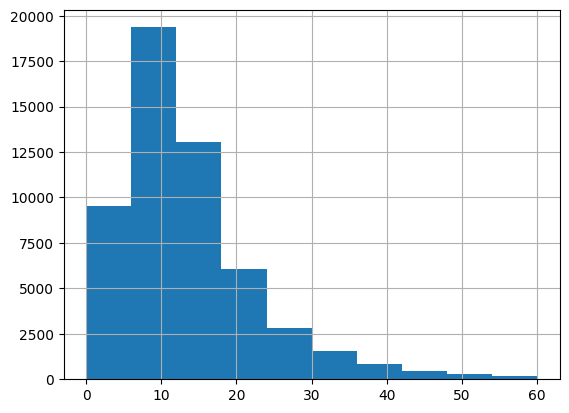

In [30]:
# create target
march_data["duration_min"] = march_data.lpep_dropoff_datetime - march_data.lpep_pickup_datetime
march_data.duration_min = march_data.duration_min.apply(lambda td : float(td.total_seconds())/60)

# filter out outliers
march_data = march_data[(march_data.duration_min >= 0) & (march_data.duration_min <= 60)]
march_data = march_data[(march_data.passenger_count > 0) & (march_data.passenger_count <= 8)]

march_data.duration_min.hist()

# data labeling
target = "duration_min"
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount"]
cat_features = ["PULocationID", "DOLocationID"]


train_data = march_data

# model initialization
model = LinearRegression()
model.fit(train_data[num_features + cat_features], train_data[target])

# model prediction
train_preds = model.predict(train_data[num_features + cat_features])
train_data['prediction'] = train_preds

print("Train MAE: ", mean_absolute_error(train_data.duration_min, train_data.prediction))

**Dump Model and Reference Data**

In [9]:
import os
folder_path = "./models/"

if os.path.exists(folder_path):
    print("Folder exists")
else:
    os.makedirs(folder_path)
    print("Folder created")
    
with open('models/lin_reg_march_data.bin', 'wb') as f_out:
    dump(model, f_out)
    print("Model saved successfully")
    

Folder exists
Model saved successfully
Reference data saved successfully


**Q2. Metric** <br>
Let's expand the number of data quality metrics we’d like to monitor! Please add one metric of your choice and a quantile value for the "fare_amount" column (quantile=0.5).

Hint: explore evidently metric ColumnQuantileMetric (from evidently.metrics import ColumnQuantileMetric)

What metric did you choose?

-- Answer: 
- I chose **ColumnMissingValuesMetric**, alongside the required **ColumnQuantileMetric**, to monitor completeness and central tendency of the fare_amount feature.

In [11]:
import evidently
from evidently import Report  # Correct import path
from evidently.presets import DataSummaryPreset  # Use DataSummaryPreset instead of DataQualityPreset
from evidently.metrics import QuantileValue, MissingValueCount  # Likely correct names

# Create report with correct metric names
report = Report(metrics=[
    DataSummaryPreset(),
    QuantileValue(column="fare_amount", quantile=0.5),  # Updated name
    MissingValueCount(column="fare_amount")  # Updated name
])

print("✅ Report created successfully!")

c:\Users\Damilare\anaconda3\envs\taxi_monitoring_env\Lib\site-packages\evidently\core\metric_types.py:376: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  np_bool = np.bool  # type: ignore[attr-defined]


✅ Report created successfully!


In [ ]:
report.run(current_data=march_data)

**Q3. Monitoring** <br>
Let’s start monitoring. Run expanded monitoring for a new batch of data (March 2024).

What is the maximum value of metric quantile = 0.5 on the "fare_amount" column during March 2024 (calculated daily)?

- 10
- 12.5
- 14.2
- 14.8

In [22]:
from evidently import Report
from evidently.metrics import QuantileValue
import pandas as pd

df = march_data
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# Filter for March 2024 ONLY
march_2024_data = df[(df['pickup_datetime'].dt.year == 2024) & 
                     (df['pickup_datetime'].dt.month == 3)]

print(f"Total records: {len(df)}")
print(f"March 2024 records: {len(march_2024_data)}")

daily_medians = []

# Process only March 2024 data
for day, group in march_2024_data.groupby(march_2024_data['pickup_datetime'].dt.date):
    # Calculate directly
    direct_median = group['fare_amount'].quantile(0.5)
    
    daily_medians.append((day, direct_median))
    print(f"Date: {day}, Median: {direct_median:.2f}")

median_df = pd.DataFrame(daily_medians, columns=["date", "median_fare"])
print(f"\nMax median for March 2024: {median_df['median_fare'].max()}")

# Show which date had the maximum
max_date = median_df.loc[median_df['median_fare'].idxmax(), 'date']
max_value = median_df['median_fare'].max()
print(f"Maximum occurred on: {max_date} with value: {max_value}")

Total records: 54135
March 2024 records: 54125
Date: 2024-03-01, Median: 13.50
Date: 2024-03-02, Median: 12.80
Date: 2024-03-03, Median: 14.20
Date: 2024-03-04, Median: 12.80
Date: 2024-03-05, Median: 12.80
Date: 2024-03-06, Median: 12.80
Date: 2024-03-07, Median: 13.50
Date: 2024-03-08, Median: 12.80
Date: 2024-03-09, Median: 13.50
Date: 2024-03-10, Median: 14.20
Date: 2024-03-11, Median: 12.80
Date: 2024-03-12, Median: 12.80
Date: 2024-03-13, Median: 13.50
Date: 2024-03-14, Median: 14.20
Date: 2024-03-15, Median: 13.50
Date: 2024-03-16, Median: 13.50
Date: 2024-03-17, Median: 13.50
Date: 2024-03-18, Median: 12.80
Date: 2024-03-19, Median: 13.50
Date: 2024-03-20, Median: 12.80
Date: 2024-03-21, Median: 13.50
Date: 2024-03-22, Median: 12.80
Date: 2024-03-23, Median: 12.80
Date: 2024-03-24, Median: 14.02
Date: 2024-03-25, Median: 13.50
Date: 2024-03-26, Median: 13.50
Date: 2024-03-27, Median: 12.80
Date: 2024-03-28, Median: 13.25
Date: 2024-03-29, Median: 12.80
Date: 2024-03-30, Median:

**Q4. Dashboard** <br>  
Finally, let’s add panels with new added metrics to the dashboard. After we customize the dashboard let's save a dashboard config, so that we can access it later. Hint: click on “Save dashboard” to access JSON configuration of the dashboard. This configuration should be saved locally.

Where to place a dashboard config file?

- project_folder (05-monitoring)
- project_folder/config (05-monitoring/config)
- project_folder/dashboards (05-monitoring/dashboards)
- project_folder/data (05-monitoring/data)

In [33]:
with open('./models/lin_reg_march_data.bin', 'rb') as f_in:
    model = load(f_in)

from evidently.core.datasets import ColumnMapping

column_mapping = ColumnMapping(
    target=None,
    prediction="prediction",
    numerical_features=num_features,
    categorical_features=cat_features
)

report = Report(metrics=[
    DataSummaryPreset(),
    QuantileValue(column="fare_amount", quantile=0.5),
    MissingValueCount(column="fare_amount")
])

In [38]:
from evidently.presets import DataDriftPreset, DataSummaryPreset
from evidently.ui.workspace import Workspace


In [ ]:
from evidently.ui.dashboards import DashboardPanelCounter, DashboardPanelPlot, CounterAgg, PanelValue, PlotType, ReportFilter
from evidently.renderers.html_widgets import WidgetSize

# create a workspace
ws = Workspace("workspace")
# Create a project
project = ws.create_project("NYC Taxi Data Quality Project")
project.description = "My project description"
project.save()

#configure the dashboard
project.dashboard.add_panel(
    DashboardPanelCounter(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        agg=CounterAgg.NONE,
        title="NYC taxi data dashboard"
    )
)

project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Inference Count",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_rows",
                legend="count"
            ),
        ],
        plot_type=PlotType.BAR,
        size=WidgetSize.HALF,
    ),
)

project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Number of Missing Values",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_missing_values",
                legend="count"
            ),
        ],
        plot_type=PlotType.LINE,
        size=WidgetSize.HALF,
    ),
)

project.save()

